In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [9]:
rand = tf.random.uniform(shape=(1,), minval=0, maxval=1)
print(rand)
rand.shape

tf.Tensor([0.23866785], shape=(1,), dtype=float32)


TensorShape([1])

In [10]:
rand = tf.random.uniform(shape=(2,1), minval=0, maxval=1)
print(rand)
rand.shape

tf.Tensor(
[[0.5913074]
 [0.234218 ]], shape=(2, 1), dtype=float32)


TensorShape([2, 1])

In [14]:
rand = tf.random.normal(shape=(2,2), mean=0, stddev=1)
print(rand)
rand.shape

tf.Tensor(
[[0.5284244  0.48240915]
 [0.39969355 0.78370917]], shape=(2, 2), dtype=float32)


TensorShape([2, 2])

In [16]:
rand1 = tf.random.uniform(shape=(4,))
rand2 = tf.random.normal(shape=(4,))

print(rand1)
print(rand2)

print(rand1[0], rand1[1])
print(rand2[0], rand2[-1])

tf.Tensor([0.532581   0.90151215 0.41525543 0.27367032], shape=(4,), dtype=float32)
tf.Tensor([ 1.647335    0.90361685  0.42055696 -0.13733457], shape=(4,), dtype=float32)
tf.Tensor(0.532581, shape=(), dtype=float32) tf.Tensor(0.90151215, shape=(), dtype=float32)
tf.Tensor(1.647335, shape=(), dtype=float32) tf.Tensor(-0.13733457, shape=(), dtype=float32)


In [19]:
import tensorflow as tf

x= 1.5
w = tf.Variable(2.0)
b = tf.Variable(0.7)

y = x*w + b
print('y=', y)

if y == 3.7:
    print('right!')

y= tf.Tensor(3.7, shape=(), dtype=float32)
right!


In [20]:
import tensorflow as tf
import numpy as np

x = [i for i in range(1, 11)]
y = [3, 5, 5, 6, 7, 7, 8, 9, 9, 10]

w = tf.Variable(tf.random.normal(shape=(1,)))
b = tf.Variable(tf.random.normal(shape=(1,)))

def compute_loss():
    y_pred = x*w + b
    loss = tf.reduce_mean((y-y_pred)**2)
    return loss

In [21]:
optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w, b])
    if i % 100 == 0:
        print(i, 'loss:', compute_loss().numpy(), '\n')
print('final w:', w)
print('final b:', b)

0 loss: 166.69434 

100 loss: 0.15474573 

200 loss: 0.14674827 

300 loss: 0.14330529 

400 loss: 0.14215805 

500 loss: 0.14187773 

600 loss: 0.14182623 

700 loss: 0.14181904 

800 loss: 0.14181823 

900 loss: 0.14181814 

final w: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.7090952], dtype=float32)>
final b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9999714], dtype=float32)>


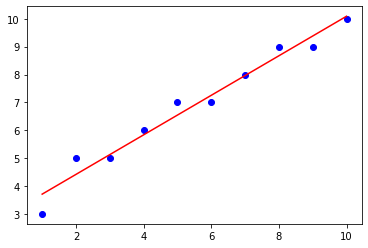

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x, y, 'bo')
plt.plot(x, w*x + b, 'red')
plt.show()

결론: 이렇게 하는 것도 선형회귀를 만드는 좋은 방법이긴 하나, y = x*w + b 가 데이터를 가장 잘 나타낸다는 보장이 어디있는가? 이건 인간이 만들어 준거야. 지금부터는 이 식조차도 컴터에게 찾으라고 할거야.

## 신경망 네트워크를 이용한 모델 생성

In [27]:
import tensorflow as tf
import numpy as np

x = [i for i in range(1, 11)]
y = [3, 5, 5, 6, 7, 7, 8, 9, 9, 10]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation='tanh', input_dim=1))
model.add(tf.keras.layers.Dense(units=1))

In [28]:
opt = tf.keras.optimizers.Adam(learning_rate=0.07)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x, y, epochs=1000)

Train on 10 samples
Epoch 1/1000
10/10 [==============================] - 1s 69ms/sample - loss: 49.8279
Epoch 2/1000
10/10 [==============================] - 0s 4ms/sample - loss: 37.1853
Epoch 3/1000
10/10 [==============================] - 0s 4ms/sample - loss: 26.5370
Epoch 4/1000
10/10 [==============================] - 0s 4ms/sample - loss: 18.1221
Epoch 5/1000
10/10 [==============================] - 0s 4ms/sample - loss: 12.5459
Epoch 6/1000
10/10 [==============================] - 0s 4ms/sample - loss: 9.2941
Epoch 7/1000
10/10 [==============================] - 0s 4ms/sample - loss: 7.1440
Epoch 8/1000
10/10 [==============================] - 0s 4ms/sample - loss: 5.5227
Epoch 9/1000
10/10 [==============================] - 0s 4ms/sample - loss: 4.3295
Epoch 10/1000
10/10 [==============================] - 0s 4ms/sample - loss: 3.5494
Epoch 11/1000
10/10 [==============================] - 0s 4ms/sample - loss: 3.1417
Epoch 12/1000
10/10 [==============================] - 0s 4

Epoch 99/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0829
Epoch 100/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0825
Epoch 101/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0824
Epoch 102/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0820
Epoch 103/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0817
Epoch 104/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0815
Epoch 105/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0813
Epoch 106/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0809
Epoch 107/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0806
Epoch 108/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0805
Epoch 109/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0801
Epoch 110/1000
10/10 [==============================] - 0s 3ms/sam

Epoch 196/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0728
Epoch 197/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0727
Epoch 198/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0727
Epoch 199/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0727
Epoch 200/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0727
Epoch 201/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0727
Epoch 202/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0726
Epoch 203/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0726
Epoch 204/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0726
Epoch 205/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0726
Epoch 206/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0726
Epoch 207/1000
10/10 [==============================] - 0s 3ms/sa

Epoch 293/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0709
Epoch 294/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0708
Epoch 295/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0708
Epoch 296/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0708
Epoch 297/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0708
Epoch 298/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0708
Epoch 299/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0707
Epoch 300/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0707
Epoch 301/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0707
Epoch 302/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0707
Epoch 303/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0707
Epoch 304/1000
10/10 [==============================] - 0s 4ms/sa

Epoch 390/1000
10/10 [==============================] - 0s 5ms/sample - loss: 0.0692
Epoch 391/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0692
Epoch 392/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0692
Epoch 393/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0692
Epoch 394/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0692
Epoch 395/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0691
Epoch 396/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0691
Epoch 397/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0691
Epoch 398/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0691
Epoch 399/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0691
Epoch 400/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0691
Epoch 401/1000
10/10 [==============================] - 0s 3ms/sa

Epoch 487/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0678
Epoch 488/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0678
Epoch 489/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0678
Epoch 490/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0678
Epoch 491/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0678
Epoch 492/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0677
Epoch 493/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0677
Epoch 494/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0677
Epoch 495/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0677
Epoch 496/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0677
Epoch 497/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0677
Epoch 498/1000
10/10 [==============================] - 0s 3ms/sa

Epoch 584/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0666
Epoch 585/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0665
Epoch 586/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0665
Epoch 587/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0665
Epoch 588/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0665
Epoch 589/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0665
Epoch 590/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0665
Epoch 591/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0665
Epoch 592/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0664
Epoch 593/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0664
Epoch 594/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0664
Epoch 595/1000
10/10 [==============================] - 0s 3ms/sa

Epoch 681/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0651
Epoch 682/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0651
Epoch 683/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0651
Epoch 684/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0651
Epoch 685/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0651
Epoch 686/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0651
Epoch 687/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0650
Epoch 688/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0650
Epoch 689/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0650
Epoch 690/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0650
Epoch 691/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0650
Epoch 692/1000
10/10 [==============================] - 0s 4ms/sa

Epoch 778/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0636
Epoch 779/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0636
Epoch 780/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0636
Epoch 781/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0636
Epoch 782/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0635
Epoch 783/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0635
Epoch 784/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0635
Epoch 785/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0635
Epoch 786/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0635
Epoch 787/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0635
Epoch 788/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0635
Epoch 789/1000
10/10 [==============================] - 0s 3ms/sa

Epoch 875/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0622
Epoch 876/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0622
Epoch 877/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0622
Epoch 878/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0622
Epoch 879/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0622
Epoch 880/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0622
Epoch 881/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0621
Epoch 882/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0621
Epoch 883/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0621
Epoch 884/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0621
Epoch 885/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0621
Epoch 886/1000
10/10 [==============================] - 0s 4ms/sa

Epoch 972/1000
10/10 [==============================] - 0s 5ms/sample - loss: 0.0611
Epoch 973/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0611
Epoch 974/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0611
Epoch 975/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0611
Epoch 976/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0610
Epoch 977/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0610
Epoch 978/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0610
Epoch 979/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0610
Epoch 980/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0610
Epoch 981/1000
10/10 [==============================] - 0s 4ms/sample - loss: 0.0610
Epoch 982/1000
10/10 [==============================] - 0s 3ms/sample - loss: 0.0610
Epoch 983/1000
10/10 [==============================] - 0s 3ms/sa

In [30]:
model.predict(x)

array([[3.01232  ],
       [4.799991 ],
       [5.3226733],
       [5.946657 ],
       [6.6639905],
       [7.367913 ],
       [8.026021 ],
       [8.665529 ],
       [9.297766 ],
       [9.89441  ]], dtype=float32)

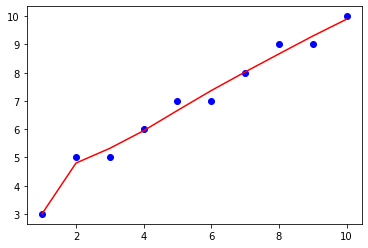

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y, 'bo')
plt.plot(x, model.predict(x), 'red')
plt.show()